In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Here we will code a neural network for a specific configuration

In [2]:
from tqdm import tqdm_notebook

In [3]:
from matplotlib import image as mp_image # matplot image

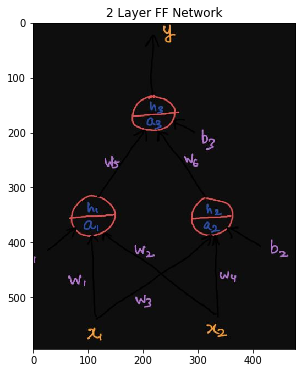

In [16]:
file_path = './twolayernn.jpg'
image = mp_image.imread(file_path)
plt.figure(figsize=(10,6))
plt.title('2 Layer FF Network')
plt.imshow(image)


We will implement the above configuration of FF neural network.

<h3> FF Neural Network Class </h3>

In [4]:
class TwoLayerFFnetwork:
    def _init_(self): 
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0

        
                    
    def forward_pass(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        
        return self.h3

        
    def grad(self, x, y):
            
        self.forward_pass(x)
        #From formula derived            
        self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
        self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
        self.db3 = (self.h3-y) * self.h3*(1-self.h3)
        
        #By using chain rule 
        self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
        self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
        self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)

        self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
        self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
        self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)

  
        
    def fit(self, X, Y, epochs=10, lr=0.01, display_loss=False, initialise=True):
        
        if display_loss:
            loss={}
                  
        if initialise:
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0

        
        
        for i in tqdm_notebook(range(epochs),total=epochs , unit="epoch"):
            dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
            for x,y in zip(X,Y):
                self.grad(x,y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3

              
            
            m = X.shape[1]
            self.w1 -= lr* dw1/m
            self.w2 -= lr* dw2/m
            self.w3 -= lr* dw3/m
            self.w4 -= lr* dw4/m
            self.w5 -= lr* dw5/m
            self.w6 -= lr* dw6/m
            self.b1 -= lr* db1/m
            self.b2 -= lr* db2/m
            self.b3 -= lr* db3/m
            
            if display_loss:
                 loss[i] = mean_squared_error(self.predict(X),Y)
        
                    
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
        
                    
        
    
    def predict(self,X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)
    
    def sigmoid(self,x):
        return 1.0/(1+(np.exp(-x)))
    

<h3> Sample Data Creation </h3>

We will create non non-linearly separate data using sklearn make_blobs library

In [5]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)
labels_orig = labels
labels = np.mod(labels_orig, 2)
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(1000, 2) (1000,)
(750, 2) (250, 2)


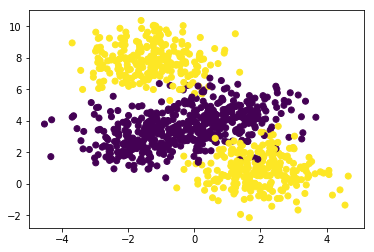

In [20]:
plt.scatter(data[:,0], data[:,1], c=labels)

Now we will train out 2 layer FF network to classify the above data, which has  been furthur split into train and validation set to compute accuracy

<h3> Training FF network and Computing accuracy </h3>

HBox(children=(IntProgress(value=0, max=1500), HTML(value='')))

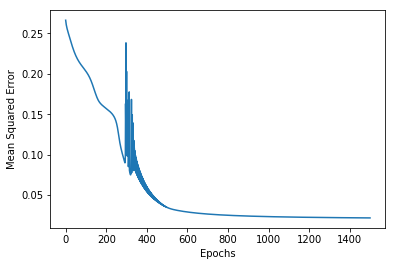

In [6]:
ffn = TwoLayerFFnetwork()
ffn.fit(X_train, Y_train, epochs=1500, lr=.01, display_loss=True)

In [7]:
Y_pred_train = ffn.predict(X_train)
Y_pred_train_binarised = (Y_pred_train >= 0.5 ).astype(int).ravel()

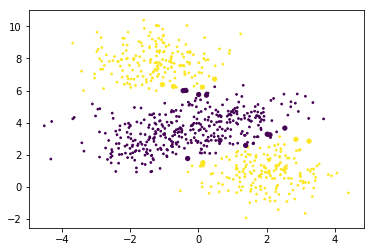

In [8]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train_binarised, s=15*(np.abs(Y_pred_train_binarised-Y_train)+.2))
plt.show()

<p>Since most of the points have small sizes, it implies that this 2 layers neural network has classified most of the points correctly. <b> Note:</b> In this plot the colouring is based on the output given by the neural network, not the true labels </p>

In [22]:
from sklearn.metrics import accuracy_score

In [24]:
Y_pred_val = ffn.predict(X_val)
Y_pred_val_binarised = (Y_pred_val >= 0.5 ).astype(int).ravel()

print('Accuracy on training data is',accuracy_score(Y_pred_train_binarised, Y_train))
print('Accuracy on validation data is',accuracy_score(Y_pred_val_binarised, Y_val))


Accuracy on training data is 0.976
Accuracy on validation data is 0.94
